<a href="https://colab.research.google.com/github/TasnimeAyed/liar_dataset/blob/master/analise_sentimento_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install language detection (english)

In [0]:
!pip install langdetect



# Import Libraries

In [0]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Install spaCy (run in terminal/prompt)
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en
import spacy

import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import string
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from textblob import TextBlob, Word

import re
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
from gensim import corpora
import gensim
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer



✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Get the Data

In [0]:
uri_train  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/train.tsv'
uri_valid  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/valid.tsv'
uri_test  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/test.tsv'

In [0]:
#the train dataset

df_train = pd.read_table(uri_train,
                             names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	
                                        'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
df_train.head(2)
df_train.describe()
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job              7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  venue            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [0]:
#the valid dataset


df_valid = pd.read_table(uri_valid,
                             names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                       'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

df_valid.head(2)
df_valid.describe()
df_valid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job              939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  venue            1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [0]:
#the test dataset


df_test = pd.read_csv(uri_test, sep='\t', 
                            names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                      'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue']) 
df_test.head(2)
df_test.describe()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job              942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  venue            1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [0]:
df = pd.concat([df_train, df_valid])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11524 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11524 non-null  object 
 1   label            11524 non-null  object 
 2   statement        11524 non-null  object 
 3   subject          11522 non-null  object 
 4   speaker          11522 non-null  object 
 5   job              8282 non-null   object 
 6   state            9037 non-null   object 
 7   party            11522 non-null  object 
 8   barely_true_c    11522 non-null  float64
 9   false_c          11522 non-null  float64
 10  half_true_c      11522 non-null  float64
 11  mostly_true_c    11522 non-null  float64
 12  pants_on_fire_c  11522 non-null  float64
 13  venue            11410 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


# Features correlations with each other and with the target


In [0]:
liar_list =pd.concat ([df,df_test])
liar_list.head(2)



id      label  ... pants_on_fire_c            venue
0   2635.json      false  ...             0.0         a mailer
1  10540.json  half-true  ...             0.0  a floor speech.

[2 rows x 14 columns]

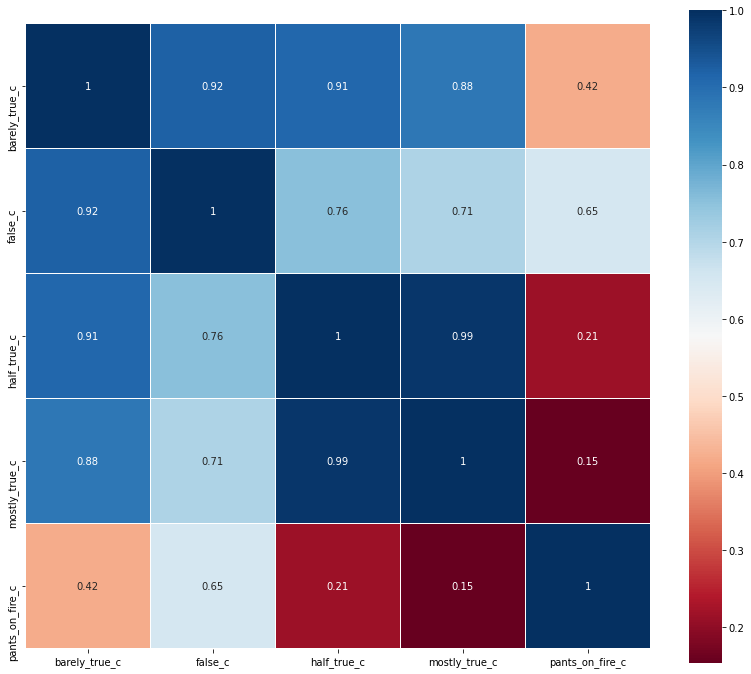

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.savefig('/content/correlation.png', dpi=None, facecolor='w',
                edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)

# Data Exploration

In [0]:
from io import StringIO

#add a column 'category_id' encoding the 'label' as an integer because categorical variables are often better represented by integers than strings.
col = ['label','statement']
liar_list = liar_list[col]
liar_list = liar_list[pd.notnull(liar_list['statement'])]
liar_list.columns = ['label', 'statement']
liar_list['category_id'] = liar_list['label'].factorize()[0]
category_id_liar_list = liar_list[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id_liar_list = dict(category_id_liar_list.values)
id_to_category = dict(category_id_liar_list[['category_id', 'label']].values)
liar_list.head()

label                                          statement  category_id
0        false  Says the Annies List political group supports ...            0
1    half-true  When did the decline of coal start? It started...            1
2  mostly-true  Hillary Clinton agrees with John McCain "by vo...            2
3        false  Health care reform legislation is likely to ma...            0
4    half-true  The economic turnaround started at the end of ...            1

# Imbalanced Classes
When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

In [0]:
#import matplotlib.pyplot as plt

#We see that the number of statements per label is imbalanced. 
#the statements are more biased towards half_true, mostly_true and false.

fig = plt.figure(figsize=(8,6))
liar_list.groupby('label').statement.count().plot.bar(ylim=0)
plt.show()

# Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.
One common approach for extracting features from text is to use the "bag of words" model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(liar_list.statement).toarray()
labels = liar_list.category_id
features.shape

#Now, each of 12791 statement is represented by 5581 features, 
#representing the tf-idf score for different unigrams and bigrams.

(12791, 5581)

In [0]:
#We can use "sklearn.feature_selection.chi2" to find the terms that are the most correlated with each of the labels

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for label, category_id in sorted(category_to_id_liar_list.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'barely-true':
  . Most correlated unigrams:
. coffman
. benghazi
  . Most correlated bigrams:
. deciding vote
. unemployment percent
# 'false':
  . Most correlated unigrams:
. scheme
. debunked
  . Most correlated bigrams:
. ponzi scheme
. terry mcauliffe
# 'half-true':
  . Most correlated unigrams:
. ranking
. indiana
  . Most correlated bigrams:
. time state
. americans work
# 'mostly-true':
  . Most correlated unigrams:
. percent
. industrialized
  . Most correlated bigrams:
. cut half
. highest corporate
# 'pants-fire':
  . Most correlated unigrams:
. muslim
. socialists
  . Most correlated bigrams:
. says barack
. voter fraud
# 'true':
  . Most correlated unigrams:
. prisons
. compensation
  . Most correlated bigrams:
. born wedlock
. 96 percent


# Multi-Class Classifier: Features and Design
After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

In [0]:
#Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(liar_list['statement'], liar_list['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(liar_list['statement'], liar_list['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [40]:
y_train_counts = count_vect.fit_transform(y_train)
tfidf_transformer = TfidfTransformer()
y_train_tfidf = tfidf_transformer.fit_transform(y_train_counts)
clf.predict(y_train_tfidf)


ValueError: ignored

In [44]:
y_train_tfidf.shape,
X_train_tfidf.shape

(9593, 11835)

In [35]:
#predection


 # "Wisconsin is on pace to double the number of layoffs this year."])))

['half-true']


In [0]:
liar_list[liar_list['statement'] == 
                        "Says John McCain has done nothing to help the vets."]

label                                          statement  category_id
2  false  Says John McCain has done nothing to help the ...            0

Step I: Preprocessing (Data preparation)

In [0]:
#converting text to numerical data in two steps: 
#1- Lemmatizing: bringing all words back to their ‘base form’ in order to make an easier word count
#2- Vectorizing: applying an algorithm that is based on wordcount (more advanced)